In [152]:
import pandas as pd
import numpy as np

velib_data = pd.read_csv("data_test/velib_data.csv")

In [153]:
# See the first five rows
velib_data.head()

,ID location,ID abonné,ID Abonnement,Type d'abonnement,ID Vélo,Type de vélo,Version vBox,Date/heure de début de la location,ID station départ,Nom station départ,CP station départ,Ville départ,Date/heure de fin de la location,ID station arrivée,Nom station arrivée,CP station arrivée,Ville arrivée,Durée location (mn),Distance parcourue en mètres,Montant de la course en euros
0,"1,806,565,011",9.425151e+16,821238,V-Plus,21329.0,VM,3.38,7/24/2019 11:55,10025,Jemmapes - Ecluses Saint-Martin,75010,PARIS 10,7/24/2019 12:11,4104,Sebastopol - Rambuteau,75004,PARIS 04,16.48,2721,0
1,"1,807,295,310",9.425151e+16,821238,V-Plus,195.0,VM,3.38,7/24/2019 14:14,4104,Sebastopol - Rambuteau,75004,PARIS 04,7/24/2019 14:32,10025,Jemmapes - Ecluses Saint-Martin,75010,PARIS 10,18.30,3087,0
2,"1,843,776,641",9.425151e+16,821238,V-Plus,24339.0,VM,3.38,7/28/2019 14:20,10151,Gare du Nord - Faubourg Saint-Denis,75010,PARIS 10,7/28/2019 14:23,10026,Gare de l'Est - Chateau Landon,75010,PARIS 10,2.63,553,0
3,"1,847,609,163",9.425151e+16,821238,V-Plus,7840.0,VM,3.38,7/29/2019 7:31,17108,Bessières - Porte de Clichy,75017,PARIS 17,7/29/2019 7:41,17023,Porte d'Asnières,75017,PARIS 17,10.11,2131,0
4,"1,851,069,210",9.425151e+16,821238,V-Plus,22372.0,VM,3.38,7/29/2019 16:28,17108,Bessières - Porte de Clichy,75017,PARIS 17,7/29/2019 16:50,10162,Alexandre Parodi - Quai de Valmy,75010,PARIS 10,22.43,5787,0


In [154]:
# get the number of missing data points per column
missing_values_count = velib_data.isnull().sum()

missing_values_count

ID location                           0
ID abonné                             0
ID Abonnement                         0
Type d'abonnement                     0
ID Vélo                               5
Type de vélo                          5
Version vBox                          9
Date/heure de début de la location    0
ID station départ                     0
Nom station départ                    0
CP station départ                     0
Ville départ                          0
Date/heure de fin de la location      0
ID station arrivée                    0
Nom station arrivée                   0
CP station arrivée                    0
Ville arrivée                         0
Durée location (mn)                   0
Distance parcourue en mètres          0
Montant de la course en euros         0
dtype: int64

In [155]:
# how many total missing values do we have ? 
total_cells = np.product(velib_data.shape)
total_missing = missing_values_count.sum()

print(total_cells)
print(total_missing)

# percent of data that is missing
percent_missing =(total_missing/total_cells)*100
percent_missing

8240
19


0.23058252427184464

In [156]:
velib_data.shape
velib_data.columns

Index(['ID location', 'ID abonné', 'ID Abonnement', 'Type d'abonnement',
       'ID Vélo', 'Type de vélo', 'Version vBox',
       'Date/heure de début de la location', 'ID station départ',
       'Nom station départ', 'CP station départ', 'Ville départ',
       'Date/heure de fin de la location', 'ID station arrivée',
       'Nom station arrivée', 'CP station arrivée', 'Ville arrivée',
       'Durée location (mn)', 'Distance parcourue en mètres',
       'Montant de la course en euros'],
      dtype='object')

In [157]:

velib_data = velib_data.drop(velib_data.columns[6], axis=1)
missing_values_count = velib_data.isnull().sum()

missing_values_count


ID location                           0
ID abonné                             0
ID Abonnement                         0
Type d'abonnement                     0
ID Vélo                               5
Type de vélo                          5
Date/heure de début de la location    0
ID station départ                     0
Nom station départ                    0
CP station départ                     0
Ville départ                          0
Date/heure de fin de la location      0
ID station arrivée                    0
Nom station arrivée                   0
CP station arrivée                    0
Ville arrivée                         0
Durée location (mn)                   0
Distance parcourue en mètres          0
Montant de la course en euros         0
dtype: int64

In [158]:
velib_data.iloc[22]

ID location                                                       1,916,227,662
ID abonné                                                           9.42515e+16
ID Abonnement                                                            821238
Type d'abonnement                                                        V-Plus
ID Vélo                                                                   23312
Type de vélo                                                                 VM
Date/heure de début de la location                               8/8/2019 16:40
ID station départ                                                         10165
Nom station départ                    Gare de l'Est - Place du 11 Novembre 1918
CP station départ                                                         75010
Ville départ                                                           PARIS 10
Date/heure de fin de la location                                 8/8/2019 16:43
ID station arrivée                      

In [159]:
velib_data['Type d\'abonnement'] == "V-Plus"

0       True
1       True
2       True
3       True
4       True
       ...  
407    False
408    False
409     True
410     True
411     True
Name: Type d'abonnement, Length: 412, dtype: bool

In [160]:
velib_data.loc[velib_data['Type d\'abonnement'] == "V-Plus"]

,ID location,ID abonné,ID Abonnement,Type d'abonnement,ID Vélo,Type de vélo,Date/heure de début de la location,ID station départ,Nom station départ,CP station départ,Ville départ,Date/heure de fin de la location,ID station arrivée,Nom station arrivée,CP station arrivée,Ville arrivée,Durée location (mn),Distance parcourue en mètres,Montant de la course en euros
0,"1,806,565,011",9.425151e+16,821238,V-Plus,21329.0,VM,7/24/2019 11:55,10025,Jemmapes - Ecluses Saint-Martin,75010,PARIS 10,7/24/2019 12:11,4104,Sebastopol - Rambuteau,75004,PARIS 04,16.48,2721,0
1,"1,807,295,310",9.425151e+16,821238,V-Plus,195.0,VM,7/24/2019 14:14,4104,Sebastopol - Rambuteau,75004,PARIS 04,7/24/2019 14:32,10025,Jemmapes - Ecluses Saint-Martin,75010,PARIS 10,18.30,3087,0
2,"1,843,776,641",9.425151e+16,821238,V-Plus,24339.0,VM,7/28/2019 14:20,10151,Gare du Nord - Faubourg Saint-Denis,75010,PARIS 10,7/28/2019 14:23,10026,Gare de l'Est - Chateau Landon,75010,PARIS 10,2.63,553,0
3,"1,847,609,163",9.425151e+16,821238,V-Plus,7840.0,VM,7/29/2019 7:31,17108,Bessières - Porte de Clichy,75017,PARIS 17,7/29/2019 7:41,17023,Porte d'Asnières,75017,PARIS 17,10.11,2131,0
4,"1,851,069,210",9.425151e+16,821238,V-Plus,22372.0,VM,7/29/2019 16:28,17108,Bessières - Porte de Clichy,75017,PARIS 17,7/29/2019 16:50,10162,Alexandre Parodi - Quai de Valmy,75010,PARIS 10,22.43,5787,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,"4,793,365,363",9.425151e+16,821238,V-Plus,3478.0,VM,5/26/2020 20:13,10037,Quai de Valmy,75010,PARIS 10,5/26/2020 20:13,10037,Quai de Valmy,75010,PARIS 10,0.06,0,0
208,"4,793,373,124",9.425151e+16,821238,V-Plus,3478.0,VM,5/26/2020 20:13,10037,Quai de Valmy,75010,PARIS 10,5/26/2020 20:18,19002,Centquatre,75019,PARIS 19,4.63,1166,0
409,"76,788,279",9.425151e+16,166792,V-Plus,8945.0,VM,3/9/2018 18:38,20024,Gambetta - Père Lachaise,75020,PARIS 20,3/9/2018 18:42,20024,Gambetta - Père Lachaise,75020,PARIS 20,4.38,181,0
410,"81,937,517",9.425151e+16,166792,V-Plus,7881.0,VM,3/16/2018 0:15,19115,Porte de la Villette,75019,PARIS 19,3/16/2018 9:49,10025,Jemmapes - Ecluses Saint-Martin,75010,PARIS 10,0.25,0,0


In [161]:
velib_data.loc[(velib_data['Type d\'abonnement'] == "V-Plus") & (velib_data['CP station départ'] == 75010)]

,ID location,ID abonné,ID Abonnement,Type d'abonnement,ID Vélo,Type de vélo,Date/heure de début de la location,ID station départ,Nom station départ,CP station départ,Ville départ,Date/heure de fin de la location,ID station arrivée,Nom station arrivée,CP station arrivée,Ville arrivée,Durée location (mn),Distance parcourue en mètres,Montant de la course en euros
0,"1,806,565,011",9.425151e+16,821238,V-Plus,21329.0,VM,7/24/2019 11:55,10025,Jemmapes - Ecluses Saint-Martin,75010,PARIS 10,7/24/2019 12:11,4104,Sebastopol - Rambuteau,75004,PARIS 04,16.48,2721,0
2,"1,843,776,641",9.425151e+16,821238,V-Plus,24339.0,VM,7/28/2019 14:20,10151,Gare du Nord - Faubourg Saint-Denis,75010,PARIS 10,7/28/2019 14:23,10026,Gare de l'Est - Chateau Landon,75010,PARIS 10,2.63,553,0
8,"1,865,334,483",9.425151e+16,821238,V-Plus,20095.0,VM,7/31/2019 17:15,10037,Quai de Valmy,75010,PARIS 10,7/31/2019 17:19,19005,Flandre - Riquet,75019,PARIS 19,4.26,1020,0
11,"1,881,296,051",9.425151e+16,821238,V-Plus,2276.0,VM,8/3/2019 12:21,10014,Marseille - Beaurepaire,75010,PARIS 10,8/3/2019 12:25,10161,Gare de l'Est - Faubourg-Saint-Martin,75010,PARIS 10,3.63,886,0
12,"1,881,974,649",9.425151e+16,821238,V-Plus,7409.0,VM,8/3/2019 14:27,10162,Alexandre Parodi - Quai de Valmy,75010,PARIS 10,8/3/2019 14:31,10036,Aqueduc - Villette,75010,PARIS 10,3.38,723,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,"4,750,600,062",9.425151e+16,821238,V-Plus,16164.0,VM,5/23/2020 23:26,10162,Alexandre Parodi - Quai de Valmy,75010,PARIS 10,5/23/2020 23:41,19002,Centquatre,75019,PARIS 19,15.01,1862,0
204,"4,756,987,232",9.425151e+16,821238,V-Plus,23786.0,VM,5/24/2020 14:46,10110,Louis Blanc - Jemmapes,75010,PARIS 10,5/24/2020 14:52,19002,Centquatre,75019,PARIS 19,5.75,1457,0
206,"4,767,974,508",9.425151e+16,821238,V-Plus,9366.0,VM,5/25/2020 10:55,10162,Alexandre Parodi - Quai de Valmy,75010,PARIS 10,5/25/2020 11:02,19014,Lorraine - Jean Jaurès,75019,PARIS 19,6.86,1616,0
207,"4,793,365,363",9.425151e+16,821238,V-Plus,3478.0,VM,5/26/2020 20:13,10037,Quai de Valmy,75010,PARIS 10,5/26/2020 20:13,10037,Quai de Valmy,75010,PARIS 10,0.06,0,0


In [162]:
velib_data.loc[(velib_data['Type d\'abonnement'] == "V-Plus") | (velib_data['CP station départ'] == 75010)]

,ID location,ID abonné,ID Abonnement,Type d'abonnement,ID Vélo,Type de vélo,Date/heure de début de la location,ID station départ,Nom station départ,CP station départ,Ville départ,Date/heure de fin de la location,ID station arrivée,Nom station arrivée,CP station arrivée,Ville arrivée,Durée location (mn),Distance parcourue en mètres,Montant de la course en euros
0,"1,806,565,011",9.425151e+16,821238,V-Plus,21329.0,VM,7/24/2019 11:55,10025,Jemmapes - Ecluses Saint-Martin,75010,PARIS 10,7/24/2019 12:11,4104,Sebastopol - Rambuteau,75004,PARIS 04,16.48,2721,0
1,"1,807,295,310",9.425151e+16,821238,V-Plus,195.0,VM,7/24/2019 14:14,4104,Sebastopol - Rambuteau,75004,PARIS 04,7/24/2019 14:32,10025,Jemmapes - Ecluses Saint-Martin,75010,PARIS 10,18.30,3087,0
2,"1,843,776,641",9.425151e+16,821238,V-Plus,24339.0,VM,7/28/2019 14:20,10151,Gare du Nord - Faubourg Saint-Denis,75010,PARIS 10,7/28/2019 14:23,10026,Gare de l'Est - Chateau Landon,75010,PARIS 10,2.63,553,0
3,"1,847,609,163",9.425151e+16,821238,V-Plus,7840.0,VM,7/29/2019 7:31,17108,Bessières - Porte de Clichy,75017,PARIS 17,7/29/2019 7:41,17023,Porte d'Asnières,75017,PARIS 17,10.11,2131,0
4,"1,851,069,210",9.425151e+16,821238,V-Plus,22372.0,VM,7/29/2019 16:28,17108,Bessières - Porte de Clichy,75017,PARIS 17,7/29/2019 16:50,10162,Alexandre Parodi - Quai de Valmy,75010,PARIS 10,22.43,5787,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,"6,820,029,562",9.425151e+16,1378981,V-Max,21161.0,VM,9/23/2020 8:20,10026,Gare de l'Est - Chateau Landon,75010,PARIS 10,9/23/2020 8:30,1002,Victoria - Place du Chatelet,75001,PARIS 01,10.26,2899,0
404,"6,846,752,267",9.425151e+16,1378981,V-Max,36477.0,VAE,9/24/2020 13:12,10026,Gare de l'Est - Chateau Landon,75010,PARIS 10,9/24/2020 13:26,17110,Legendre - Nollet,75017,PARIS 17,14.45,3991,0
409,"76,788,279",9.425151e+16,166792,V-Plus,8945.0,VM,3/9/2018 18:38,20024,Gambetta - Père Lachaise,75020,PARIS 20,3/9/2018 18:42,20024,Gambetta - Père Lachaise,75020,PARIS 20,4.38,181,0
410,"81,937,517",9.425151e+16,166792,V-Plus,7881.0,VM,3/16/2018 0:15,19115,Porte de la Villette,75019,PARIS 19,3/16/2018 9:49,10025,Jemmapes - Ecluses Saint-Martin,75010,PARIS 10,0.25,0,0


In [163]:
velib_data.loc[velib_data.col_name.isin(['75010', '75014'])]

AttributeError: 'DataFrame' object has no attribute 'col_name'

In [ ]:
# isnull() notnull()

In [ ]:
velib_data.loc[velib_data["Type de vélo"].isnull()]

In [ ]:
velib_data["Distance parcourue en mètres"].describe()

In [ ]:
velib_data["Type d'abonnement"].describe()

In [ ]:
velib_data["Ville arrivée"].unique()

In [ ]:
velib_data["Ville arrivée"].value_counts()

In [ ]:
distance = velib_data["Distance parcourue en mètres"].mean()
velib_data["Distance parcourue en mètres"].map(lambda p : p - distance)

In [ ]:
# apply()

In [ ]:
velib_data["Ville arrivée"] + "-" + str(velib_data["CP station arrivée"])

In [ ]:
n_trop = reviews.description.map(lambda desc: "tropical" in desc).sum()
n_fruity = reviews.description.map(lambda desc: "fruity" in desc).sum()
descriptor_counts = pd.Series([n_trop, n_fruity], index=['tropical', 'fruity'])

In [ ]:
velib_data.groupby("Ville arrivée")

In [ ]:
velib_data.groupby("Ville départ")["Distance parcourue en mètres"].min()

In [ ]:
velib_data.groupby("Ville départ").apply(lambda df : df["Ville arrivée"].iloc[0])

In [ ]:
velib_data.groupby(["Ville départ", "Ville arrivée"]).apply(lambda df: df.loc[df["Distance parcourue en mètres"].idxmin()])

In [ ]:
velib_data.groupby(["Ville départ", "Ville arrivée"])["Distance parcourue en mètres"].agg([len, min, max])

In [ ]:
start_end = velib_data.groupby(["Ville départ", "Ville arrivée"])["Distance parcourue en mètres"].agg([len, min, max])
start_end.reset_index()

In [ ]:
start_end = velib_data.groupby(["Ville départ", "Ville arrivée"])["Distance parcourue en mètres"].agg([len, min, max])
start_end.sort_values(by="len", ascending=False)

In [ ]:
start_end = velib_data.groupby(["Ville départ", "Ville arrivée"])["Distance parcourue en mètres"].agg([len, min, max])
start_end.sort_values(by=["max", "min"])

In [ ]:
velib_data[pd.isnull(velib_data["Type de vélo"])]

In [ ]:
velib_data["Type de vélo"].replace("NaN","Unknown")


In [ ]:
velib_data[pd.isnull(velib_data["ID Vélo"])]

In [ ]:
velib_data.rename(columns={"Distance parcourue en mètres": "distance"})

In [ ]:
velib_data.rename(columns={0: 'id_location', 1: 'id_subscriber'})

In [ ]:
velib_data.rename_axis("tags", axis="columns").rename_axis("ways", axis="rows")

In [ ]:
"""first_ds = pd.read_csv(...)
second_ds = pd.read_csv(...)

pd.concat([first_ds, second_ds])"""

In [ ]:
"""
left = first_ds.set_index(["title", "trending_date"])
right = second_ds.set_index(["title", "trending_date"])

left.join(right, lsuffix="_FIRST", rsuffix="_SECOND")
"""

In [ ]:
missing_values_count = velib_data.isnull().sum()
missing_values_count

In [ ]:
# how many total missing values do we have?
total_cells = np.product(velib_data.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

In [ ]:
# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
# from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import datetime

In [ ]:
velib_data.head()

In [ ]:
print(velib_data["Date/heure de début de la location"].head())

In [164]:
velib_data[['start_date','start_hour']] = velib_data["Date/heure de début de la location"].str.split(expand=True)
velib_data.drop(columns=["Date/heure de début de la location"], inplace=True)
velib_data[['end_date','end_hour']] = velib_data["Date/heure de fin de la location"].str.split(expand=True)
velib_data.drop(columns=["Date/heure de fin de la location"], inplace=True)
velib_data

,ID location,ID abonné,ID Abonnement,Type d'abonnement,ID Vélo,Type de vélo,ID station départ,Nom station départ,CP station départ,Ville départ,...,Nom station arrivée,CP station arrivée,Ville arrivée,Durée location (mn),Distance parcourue en mètres,Montant de la course en euros,start_date,start_hour,end_date,end_hour
0,"1,806,565,011",9.425151e+16,821238,V-Plus,21329.0,VM,10025,Jemmapes - Ecluses Saint-Martin,75010,PARIS 10,...,Sebastopol - Rambuteau,75004,PARIS 04,16.48,2721,0,7/24/2019,11:55,7/24/2019,12:11
1,"1,807,295,310",9.425151e+16,821238,V-Plus,195.0,VM,4104,Sebastopol - Rambuteau,75004,PARIS 04,...,Jemmapes - Ecluses Saint-Martin,75010,PARIS 10,18.30,3087,0,7/24/2019,14:14,7/24/2019,14:32
2,"1,843,776,641",9.425151e+16,821238,V-Plus,24339.0,VM,10151,Gare du Nord - Faubourg Saint-Denis,75010,PARIS 10,...,Gare de l'Est - Chateau Landon,75010,PARIS 10,2.63,553,0,7/28/2019,14:20,7/28/2019,14:23
3,"1,847,609,163",9.425151e+16,821238,V-Plus,7840.0,VM,17108,Bessières - Porte de Clichy,75017,PARIS 17,...,Porte d'Asnières,75017,PARIS 17,10.11,2131,0,7/29/2019,7:31,7/29/2019,7:41
4,"1,851,069,210",9.425151e+16,821238,V-Plus,22372.0,VM,17108,Bessières - Porte de Clichy,75017,PARIS 17,...,Alexandre Parodi - Quai de Valmy,75010,PARIS 10,22.43,5787,0,7/29/2019,16:28,7/29/2019,16:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,"6,946,814,980",9.425151e+16,1378981,V-Max,41619.0,VAE,7018,Ségur - d'Estrées,75007,PARIS 07,...,Récollets - Square Villemin,75010,PARIS 10,22.70,6839,0,9/30/2020,15:45,9/30/2020,16:08
408,"7,142,763,817",9.425151e+16,1378981,V-Max,13790.0,VAE,13106,Bobillot - Paulin Mery,75013,PARIS 13,...,Bobillot - Tolbiac,75013,PARIS 13,2.98,560,0,10/12/2020,16:09,10/12/2020,16:12
409,"76,788,279",9.425151e+16,166792,V-Plus,8945.0,VM,20024,Gambetta - Père Lachaise,75020,PARIS 20,...,Gambetta - Père Lachaise,75020,PARIS 20,4.38,181,0,3/9/2018,18:38,3/9/2018,18:42
410,"81,937,517",9.425151e+16,166792,V-Plus,7881.0,VM,19115,Porte de la Villette,75019,PARIS 19,...,Jemmapes - Ecluses Saint-Martin,75010,PARIS 10,0.25,0,0,3/16/2018,0:15,3/16/2018,9:49


In [170]:
velib_data["start_date"] = pd.to_datetime(velib_data["start_date"], format = "%m/%d/%Y")
velib_data["start_date"].head()

0   2019-07-24
1   2019-07-24
2   2019-07-28
3   2019-07-29
4   2019-07-29
Name: start_date, dtype: datetime64[ns]

In [171]:
day_of_mont = velib_data["start_date"].dt.day
day_of_mont.head()

0    24
1    24
2    28
3    29
4    29
Name: start_date, dtype: int64

/home/lakao/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='start_date'>

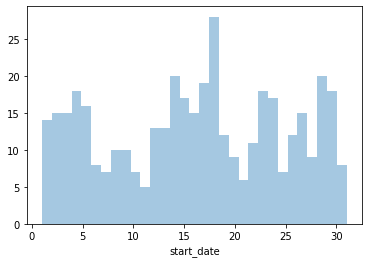

In [173]:
sns.distplot(day_of_mont, kde=False, bins=31)

In [174]:
month_of_year = velib_data["start_date"].dt.month
month_of_year.head()

0    7
1    7
2    7
3    7
4    7
Name: start_date, dtype: int64

/home/lakao/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='start_date'>

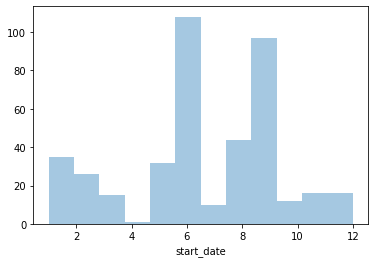

In [175]:
sns.distplot(month_of_year, kde=False, bins=12)

In [179]:
"""import chardet

# look at the first ten thousand bytes to guess the character encoding
with open("data_test/velib_data.csv") as rawdata:
    result = chardet.detect(rawdata.read(10000))

# check what the character encoding might be
print(result)

"""

'import chardet\n\n# look at the first ten thousand bytes to guess the character encoding\nwith open("data_test/velib_data.csv") as rawdata:\n    result = chardet.detect(rawdata.read(10000))\n\n# check what the character encoding might be\nprint(result)\n\n'

In [180]:
import fuzzywuzzy

In [181]:
velib_data.head()

,ID location,ID abonné,ID Abonnement,Type d'abonnement,ID Vélo,Type de vélo,ID station départ,Nom station départ,CP station départ,Ville départ,...,Nom station arrivée,CP station arrivée,Ville arrivée,Durée location (mn),Distance parcourue en mètres,Montant de la course en euros,start_date,start_hour,end_date,end_hour
0,"1,806,565,011",9.425151e+16,821238,V-Plus,21329.0,VM,10025,Jemmapes - Ecluses Saint-Martin,75010,PARIS 10,...,Sebastopol - Rambuteau,75004,PARIS 04,16.48,2721,0,2019-07-24,11:55,7/24/2019,12:11
1,"1,807,295,310",9.425151e+16,821238,V-Plus,195.0,VM,4104,Sebastopol - Rambuteau,75004,PARIS 04,...,Jemmapes - Ecluses Saint-Martin,75010,PARIS 10,18.30,3087,0,2019-07-24,14:14,7/24/2019,14:32
2,"1,843,776,641",9.425151e+16,821238,V-Plus,24339.0,VM,10151,Gare du Nord - Faubourg Saint-Denis,75010,PARIS 10,...,Gare de l'Est - Chateau Landon,75010,PARIS 10,2.63,553,0,2019-07-28,14:20,7/28/2019,14:23
3,"1,847,609,163",9.425151e+16,821238,V-Plus,7840.0,VM,17108,Bessières - Porte de Clichy,75017,PARIS 17,...,Porte d'Asnières,75017,PARIS 17,10.11,2131,0,2019-07-29,7:31,7/29/2019,7:41
4,"1,851,069,210",9.425151e+16,821238,V-Plus,22372.0,VM,17108,Bessières - Porte de Clichy,75017,PARIS 17,...,Alexandre Parodi - Quai de Valmy,75010,PARIS 10,22.43,5787,0,2019-07-29,16:28,7/29/2019,16:50


In [182]:
station = velib_data["Nom station départ"].unique()
station.sort()
station

array(['Adolphe Pinard - Victor Hugo', 'Alexandre Parodi - Quai de Valmy',
       'Aqueduc - Villette', 'Archives - Rivoli', 'Assas - Vaugirard',
       'Auguste Cain - Jean Moulin', 'Bastille - Quai de la Rapée',
       'Batignolles - Place de Clichy', 'Bercy',
       'Bessières - Porte de Clichy', 'Bobillot - Moulin des Prés',
       'Bobillot - Paulin Mery', 'Bobillot - Tolbiac',
       'Botzaris - Parc des Buttes Chaumont', 'Bourdonnais - Tour Eiffel',
       'Bridaine - Lamandé', 'Brochant - Clichy',
       'Bézout - Général Leclerc', 'Censier - Santeuil', 'Centquatre',
       'Charles de Gaulle - Plateau de Vanves',
       'Claude Bernard - Arbalète',
       'Claude Vellefaux - Hôpital Saint-Louis', 'Danton - Serpente',
       'Duroc - Place de Breteuil', 'Ecole Militaire - Place Joffre',
       'Euryale Dehaynin - Loire', 'Faubourg Du Temple - Republique',
       'Fille du Calvaire - Turenne', 'Flandre - Alphonse Karr',
       'Flandre - Ourcq', 'Flandre - Riquet',
       'Franç

In [184]:
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'Distance parcourue en mètres'}, ylabel='Distance parcourue en mètres'>

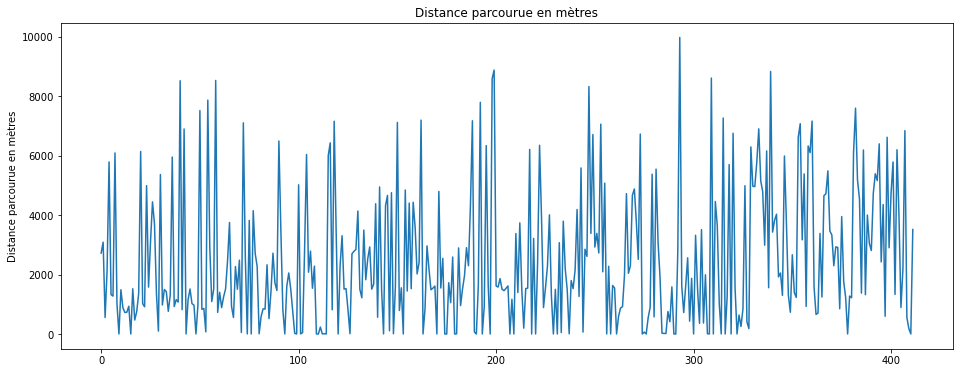

In [189]:
plt.figure(figsize=(16,6))
distance = velib_data['Distance parcourue en mètres']
date = velib_data["start_date"]
plt.title("Distance parcourue en mètres")
sns.lineplot(data=distance)

<AxesSubplot:xlabel='start_date', ylabel='Distance parcourue en mètres'>

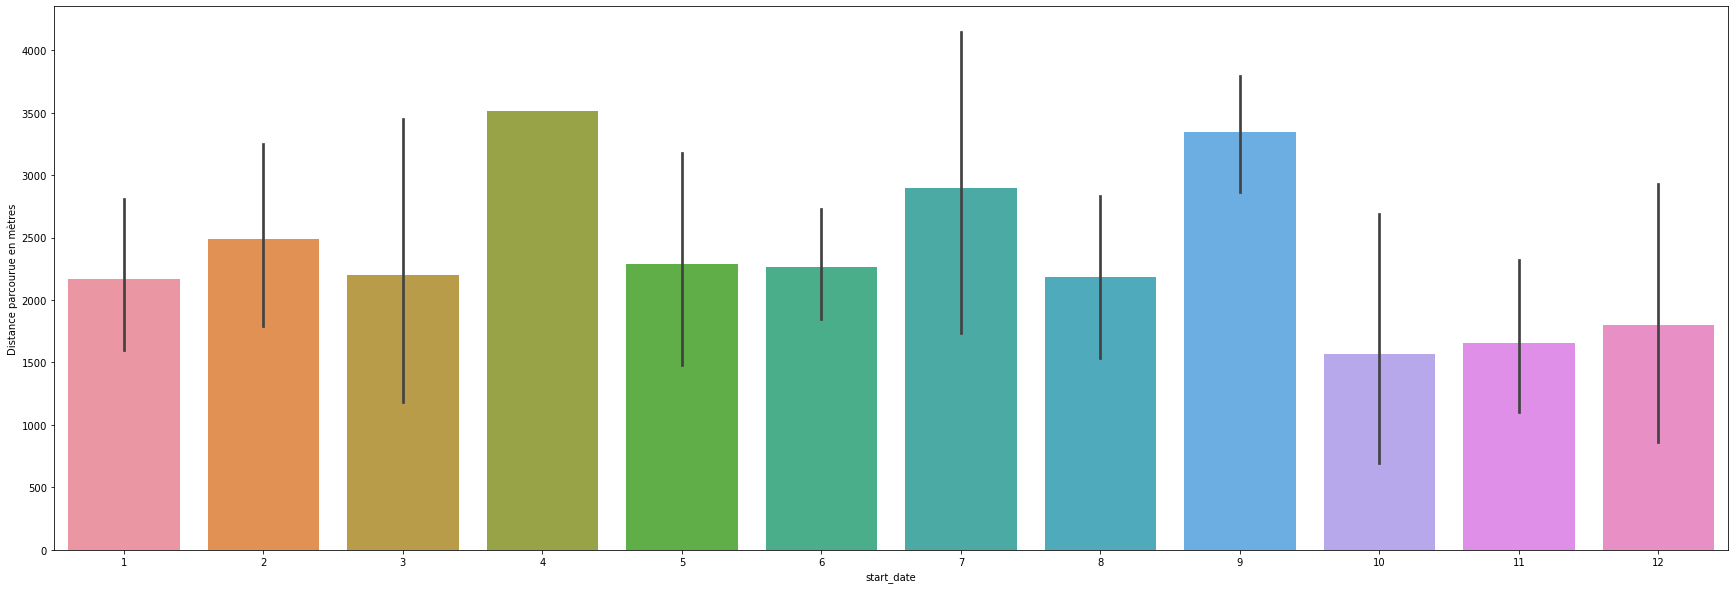

In [200]:
plt.figure(figsize=(30, 10))


sns.barplot(x=velib_data["start_date"].dt.month, y = distance)

<AxesSubplot:xlabel='start_day', ylabel='start_year'>

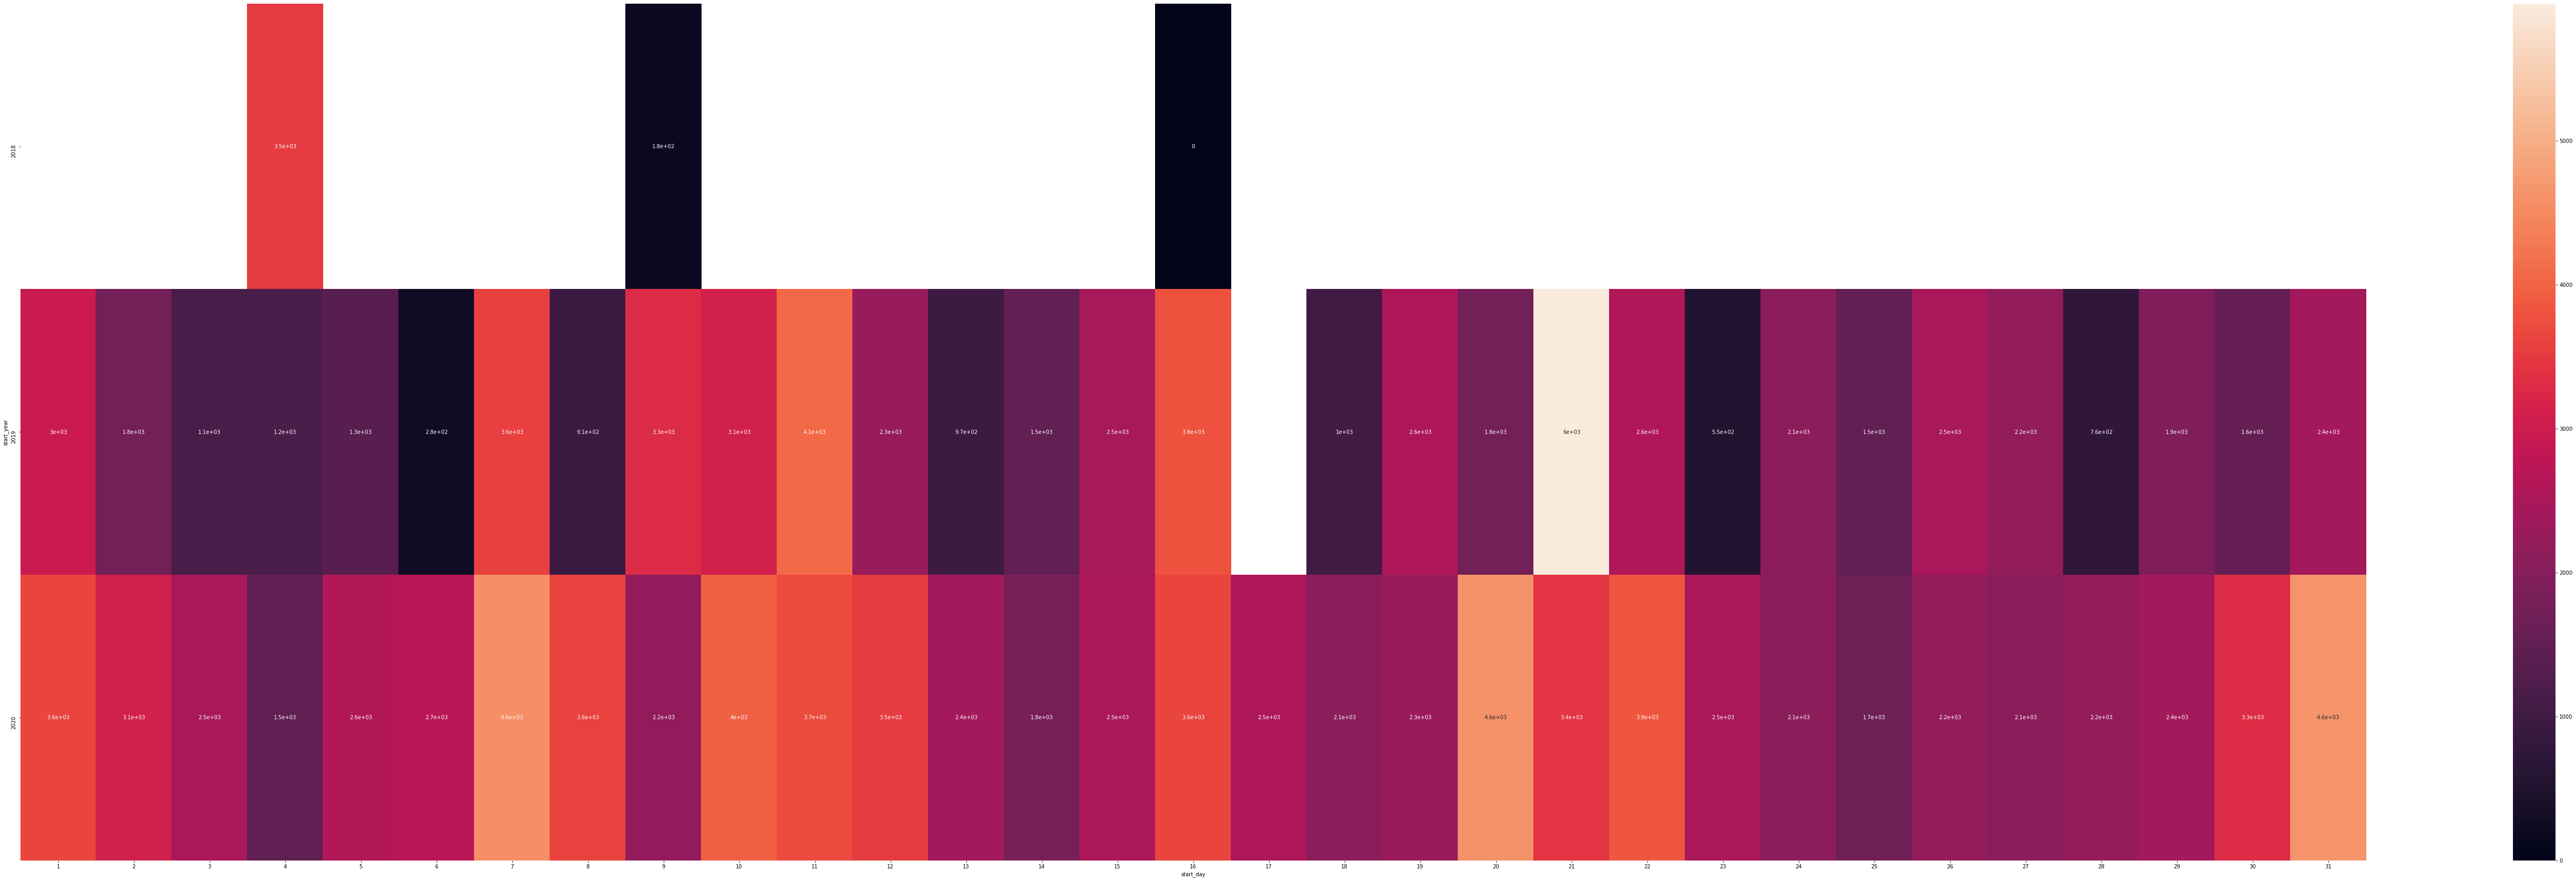

In [245]:
plt.figure(figsize=(100,30))
velib_data["start_day"]=velib_data["start_date"].dt.day
velib_data["start_month"]=velib_data["start_date"].dt.month
velib_data["start_year"]=velib_data["start_date"].dt.year
velib_data["distance"]=velib_data["Distance parcourue en mètres"]
velib_data['ardt']=velib_data["CP station départ"]
velib_data["velo_type"]=velib_data["Type de vélo"]
velib_data.head()

df = pd.pivot_table(data=velib_data,index="start_year", values="distance", columns="start_day")
df.head()
sns.heatmap(data=df, annot=True)

<AxesSubplot:xlabel='start_day', ylabel='start_month'>

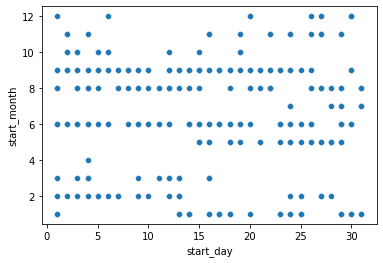

In [227]:
sns.scatterplot(x=velib_data["start_day"], y=velib_data["start_month"])

<AxesSubplot:xlabel='start_day', ylabel='distance'>

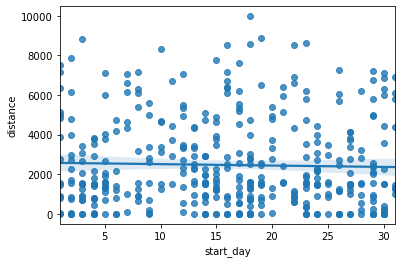

In [235]:
sns.regplot(x=velib_data["start_day"], y=velib_data["distance"])

<AxesSubplot:xlabel='start_day', ylabel='distance'>

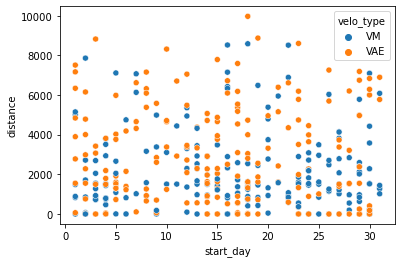

In [238]:
sns.scatterplot(x=velib_data["start_day"], y=velib_data["distance"], hue =velib_data["velo_type"])

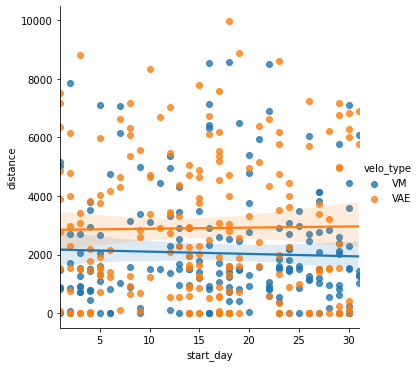

In [243]:
sns.lmplot(data=velib_data, x="start_day",y="distance", hue="velo_type")

/home/lakao/miniconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 8.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='velo_type', ylabel='distance'>

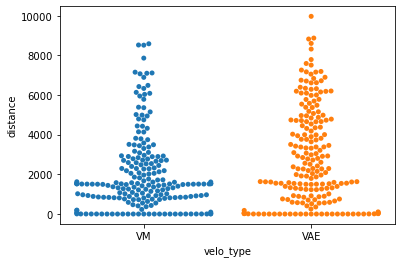

In [246]:
sns.swarmplot(data=velib_data, x="velo_type",y ="distance")

/home/lakao/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='start_month'>

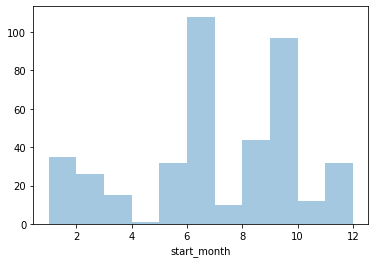

In [247]:
sns.distplot(a=velib_data["start_month"], kde=False)

<AxesSubplot:xlabel='start_month', ylabel='Density'>

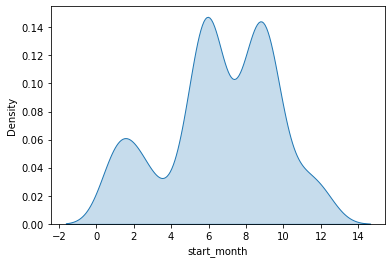

In [249]:
sns.kdeplot(data=velib_data["start_month"], shade=True)

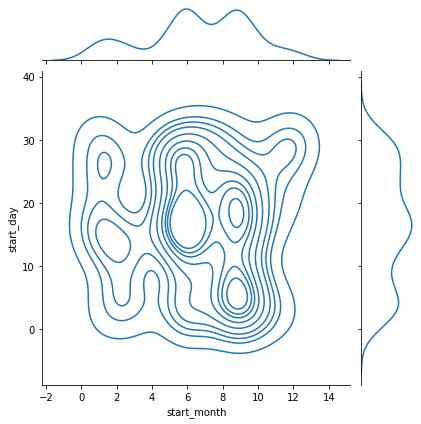

In [254]:
sns.jointplot(x=velib_data["start_month"], y=velib_data["start_day"], kind="kde")